Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=57Gqpg784pA&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=20

# Object Detection  
(Pretrained Faster-RCNN Resnet50 model, COCO dataset )

Used resources: \
https://haochen23.github.io/2020/04/object-detection-faster-rcnn.html#.Y549jC8RoWc \
https://colab.research.google.com/drive/1eAUjzV3nZXkUXi0spPg6zUHtJWaUSzFk \
https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter08/Training_Faster_RCNN.ipynb \
https://github.com/pytorch/vision/tree/v0.8.2/references/detection \
https://towardsdatascience.com/understanding-and-implementing-faster-r-cnn-a-step-by-step-guide-11acfff216b0 \
https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/torchvision_finetuning_instance_segmentation.ipynb#scrollTo=cFHKCvCTxiff \
https://www.needpix.com

In [1]:
#!pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as T
import torchvision
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
!wget -nv https://www.goodfreephotos.com/cache/other-photos/car-and-traffic-on-the-road-coming-towards-me.jpg -O traffic.jpg

2024-05-23 19:41:51 URL:https://www.goodfreephotos.com/cache/other-photos/car-and-traffic-on-the-road-coming-towards-me_800.jpg?cached=1522560655 [409997/409997] -> "traffic.jpg" [1]


In [4]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:04<00:00, 36.8MB/s]


In [5]:
def object_detection(model, img_path, confidence=0.5):

  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>confidence][-1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # print(len(boxes))
  for i in range(len(pred_boxes)):
    cv2.rectangle(img, (int(pred_boxes[i][0][0]),int(pred_boxes[i][0][1])), \
              (int(pred_boxes[i][1][0]),int(pred_boxes[i][1][1])),color=(0, 0, 255), thickness=2)
    cv2.putText(img,pred_class[i], (int(pred_boxes[i][0][0]),int(pred_boxes[i][0][1])), \
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),thickness=2)
  plt.figure(figsize=(10,25))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

Mounted at /content/drive


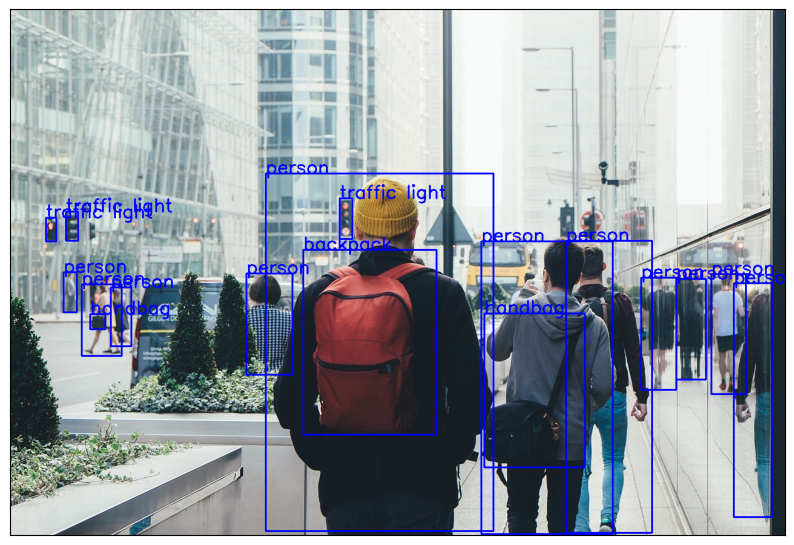

In [8]:
from google.colab import drive
drive.mount('/content/drive')
object_detection(model, '/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/people-2617235_1280.jpg', confidence=0.85)

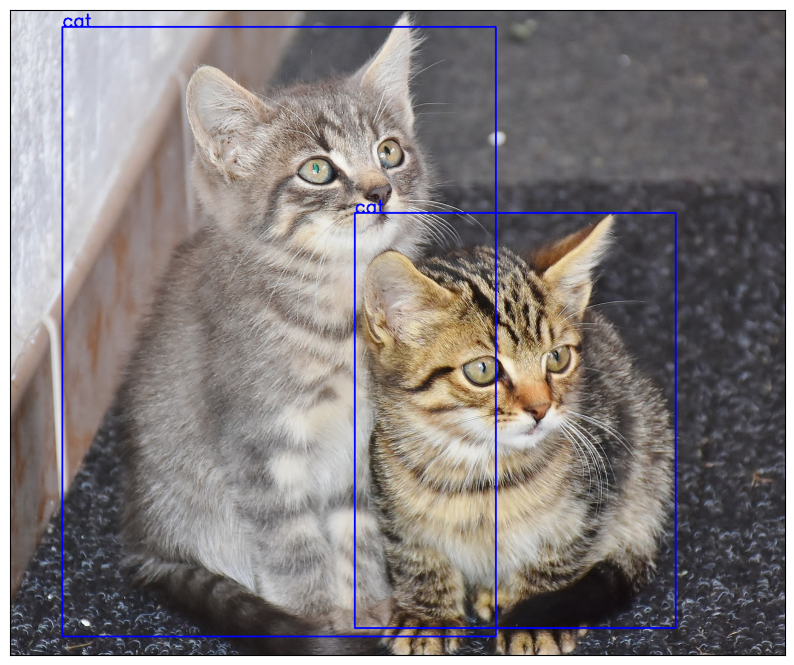

In [9]:
object_detection(model, '/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/cat-1690258_1280.jpg', confidence=0.85)

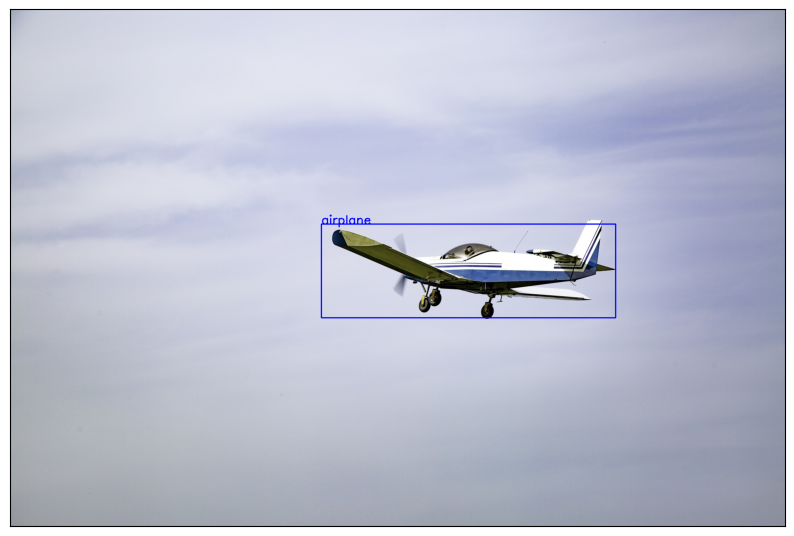

In [10]:
object_detection(model, '/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/ultralight-airplane-14679662804G2.jpg', confidence=0.95)

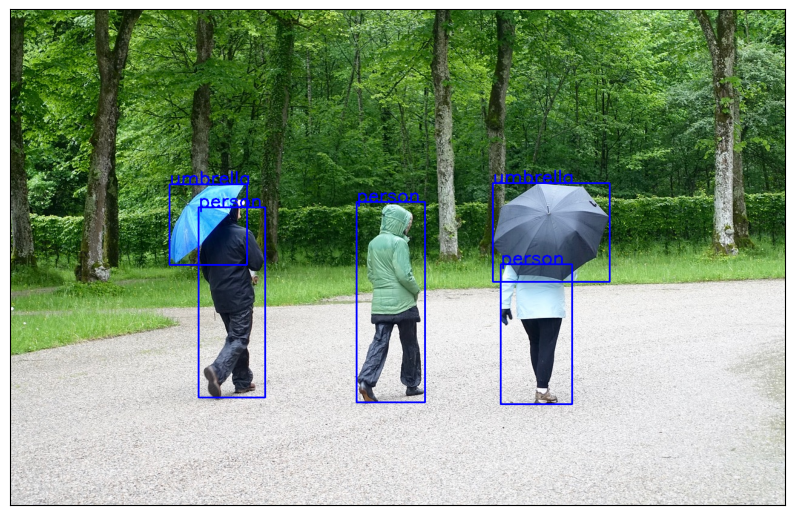

In [11]:
object_detection(model, '/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/three-1596971_1280.jpg',0.95)

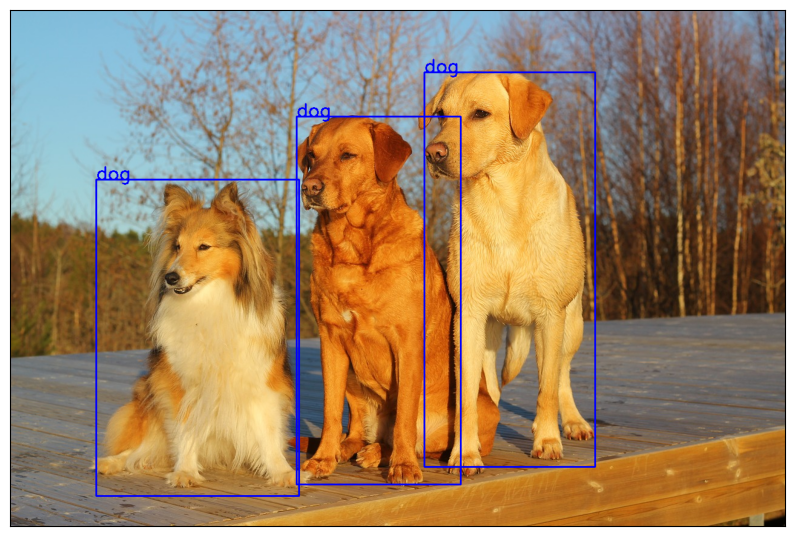

In [12]:
object_detection(model, '/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/dogs-2119339_1280.jpg',0.7)

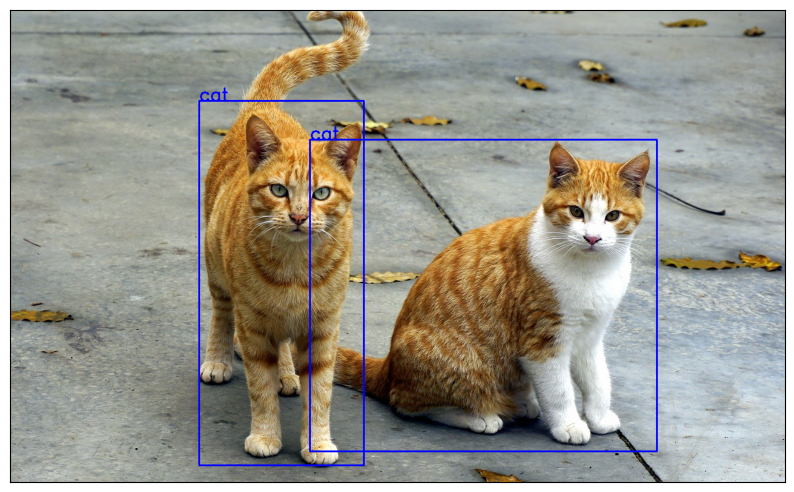

In [13]:
object_detection(model,'/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/cats-1800942_1280.jpg',0.95)

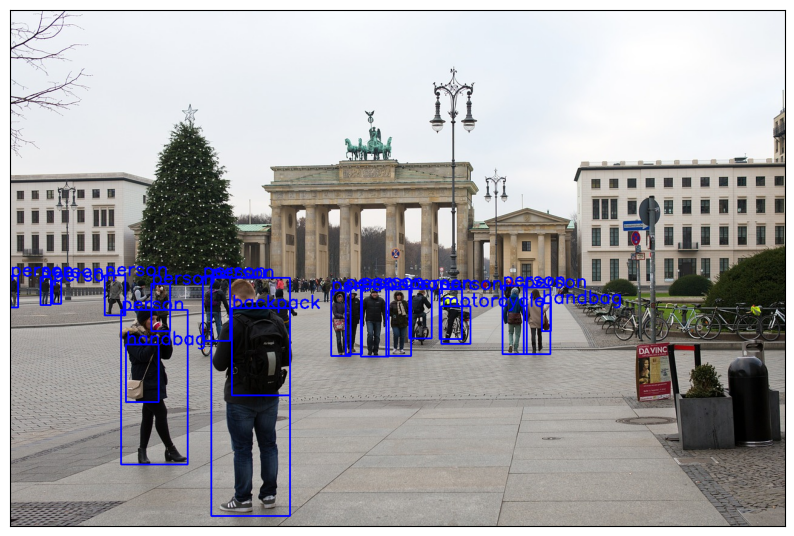

In [14]:
object_detection(model,'/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/brandenburg-gate-563114_1280.jpg',0.95)

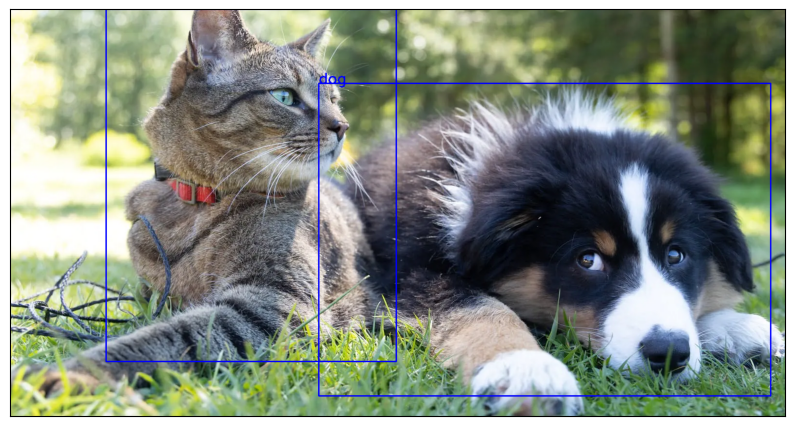

In [15]:
object_detection(model,'/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/u_7ULskLC.webp.png',0.95)

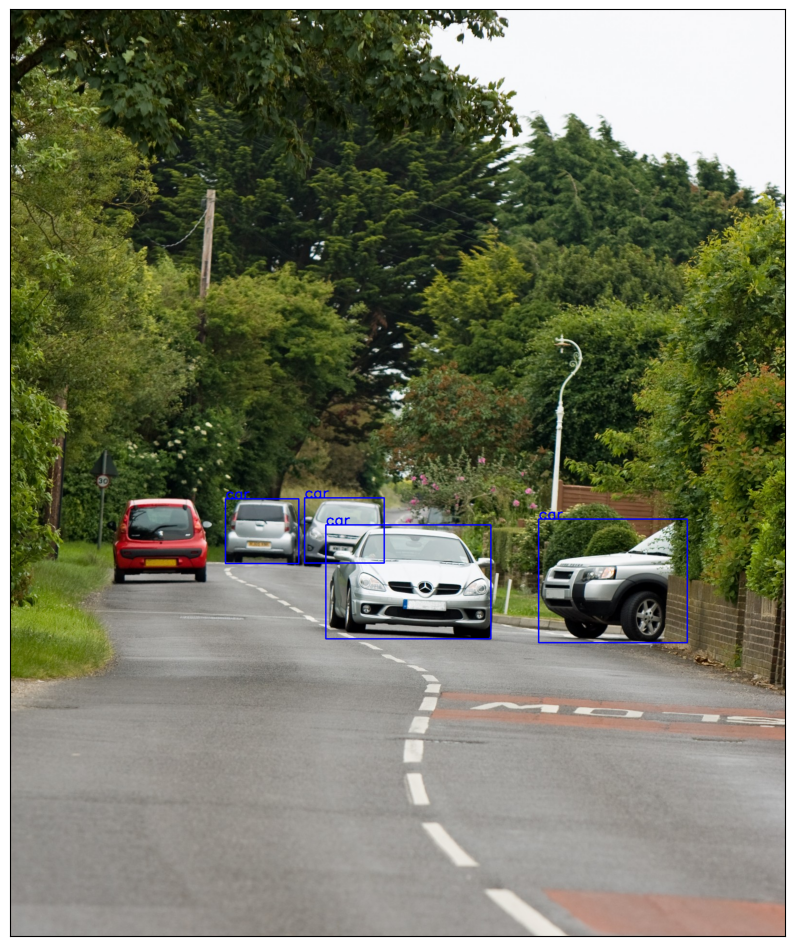

In [16]:
object_detection(model,'/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/data/faster_rcnn/cars-on-road.jpg',0.95)